In [2]:
from urllib.request import urlopen
import json
import os
from PIL import Image
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Download json file 

In [3]:
url = 'https://raw.githubusercontent.com/chenlh0/product-classification-challenge/master/product_data.json'
response = urlopen(url)
data_json = json.loads(response.read())
for i in range(len(data_json)):
  data_json[i]['Category'] = ''
  data_json[i]['#'] = i + 1
with open('data.json', 'w') as outfile:
    json.dump(data_json, outfile, indent = 2)

In [4]:
print(data_json[0])
print(data_json[0]['image_url'])

{'image_url': 'https://cdn.theyes.com/images/full/5a05c6a7540efe90c8c789f19d333f8d9a5095d7.jpg', 'description': 'Nylon, brushed leather Two leather handles Detachable adjustable leather shoulder strap Triangle logo and leather screen-printed logo Two-way zipper closure on the top Nylon lining One zipper pocket inside', 'Category': '', '#': 1}
https://cdn.theyes.com/images/full/5a05c6a7540efe90c8c789f19d333f8d9a5095d7.jpg


### *#Upload the new labeled_data.json file after manually label first 200 data.*





In [92]:
# Verify the data are labeled successfully. 
with open('/content/labeled_data.json') as f:
  data = json.load(f)
print(data[61])

{'image_url': 'https://cdn.theyes.com/images/full/68e18579c8125b120e112852f45bf218e662fa4f.jpg', 'description': 'Metal letter', 'Category': 'JEWELRY', '#': 61}


## Generate Training and Prediction Image Paths

In [6]:
training_paths = []
labels = []
prediction_paths = []
for i in range(len(data)):
  if data[i]['Category']:
    training_paths.append(data[i]['image_url'])
    labels.append(data[i]['Category'])
  else:
    prediction_paths.append(data[i]['image_url'])
print('The number of training data is {}'.format(len(training_paths)))
print('The number of training label is {}'.format(len(labels)))
print('The number of prediction data is {}'.format(len(prediction_paths)))

The number of training data is 200
The number of training label is 200
The number of prediction data is 800


In [93]:
# Verify labels and prediction image path
print(labels[0])
print(prediction_paths[0])

BAG
/content/prediction_images/p_537.jpg


In [8]:
training_paths[0]

'https://cdn.theyes.com/images/full/5a05c6a7540efe90c8c789f19d333f8d9a5095d7.jpg'

## Put Image Paths into Associated Category Directory

In [9]:
import urllib.request
for i in range(len(training_paths)):
  # The following way works. Ref: https://stackoverflow.com/a/45358832/6064933
  req = urllib.request.Request(training_paths[i], headers={'User-Agent': 'Mozilla/5.0'})
  if not os.path.isdir('/content/' + labels[i]):
    os.mkdir('/content/' + labels[i])
  with open('/content/' + str(labels[i]) + '/' + str(i) + ".jpg", "wb") as f:
      with urllib.request.urlopen(req) as r:
          f.write(r.read())

In [10]:
os.mkdir('/content/prediction_images')

FileExistsError: ignored

In [49]:
os.chdir('/content/prediction_images/')
all_files = os.listdir()

for f in all_files:
    os.remove(f)

print(os.listdir())

[]


In [50]:
len(prediction_paths)

800

In [51]:
# Generate Paths for Prediction Images
for i in range(200, len(prediction_paths) + 200):
  req = urllib.request.Request(prediction_paths[i-200], headers={'User-Agent': 'Mozilla/5.0'})
  with open('/content/prediction_images/' + 'p_' + str(i) + ".jpg", "wb") as f:
      with urllib.request.urlopen(req) as r:
          f.write(r.read())

In [14]:
# Generate Image Paths for Training Images
import glob
Category = ['BAG', 'DRESS', 'JEWELRY', 'JUMPSUIT', 'LINGERIE', 'OTHERS', 'OUTERWEAR', 'PANT', 'SHOE', 'SHORTS', 'SKIRT', 'TOPS']
all_paths = []
labels = []
for cat in Category:
    cur_paths = glob.glob("/content/" + cat + '/*')
    labels.extend([cat] * len(cur_paths))
    all_paths.extend(cur_paths)

In [15]:
len(labels)

200

In [16]:
len(all_paths)

200

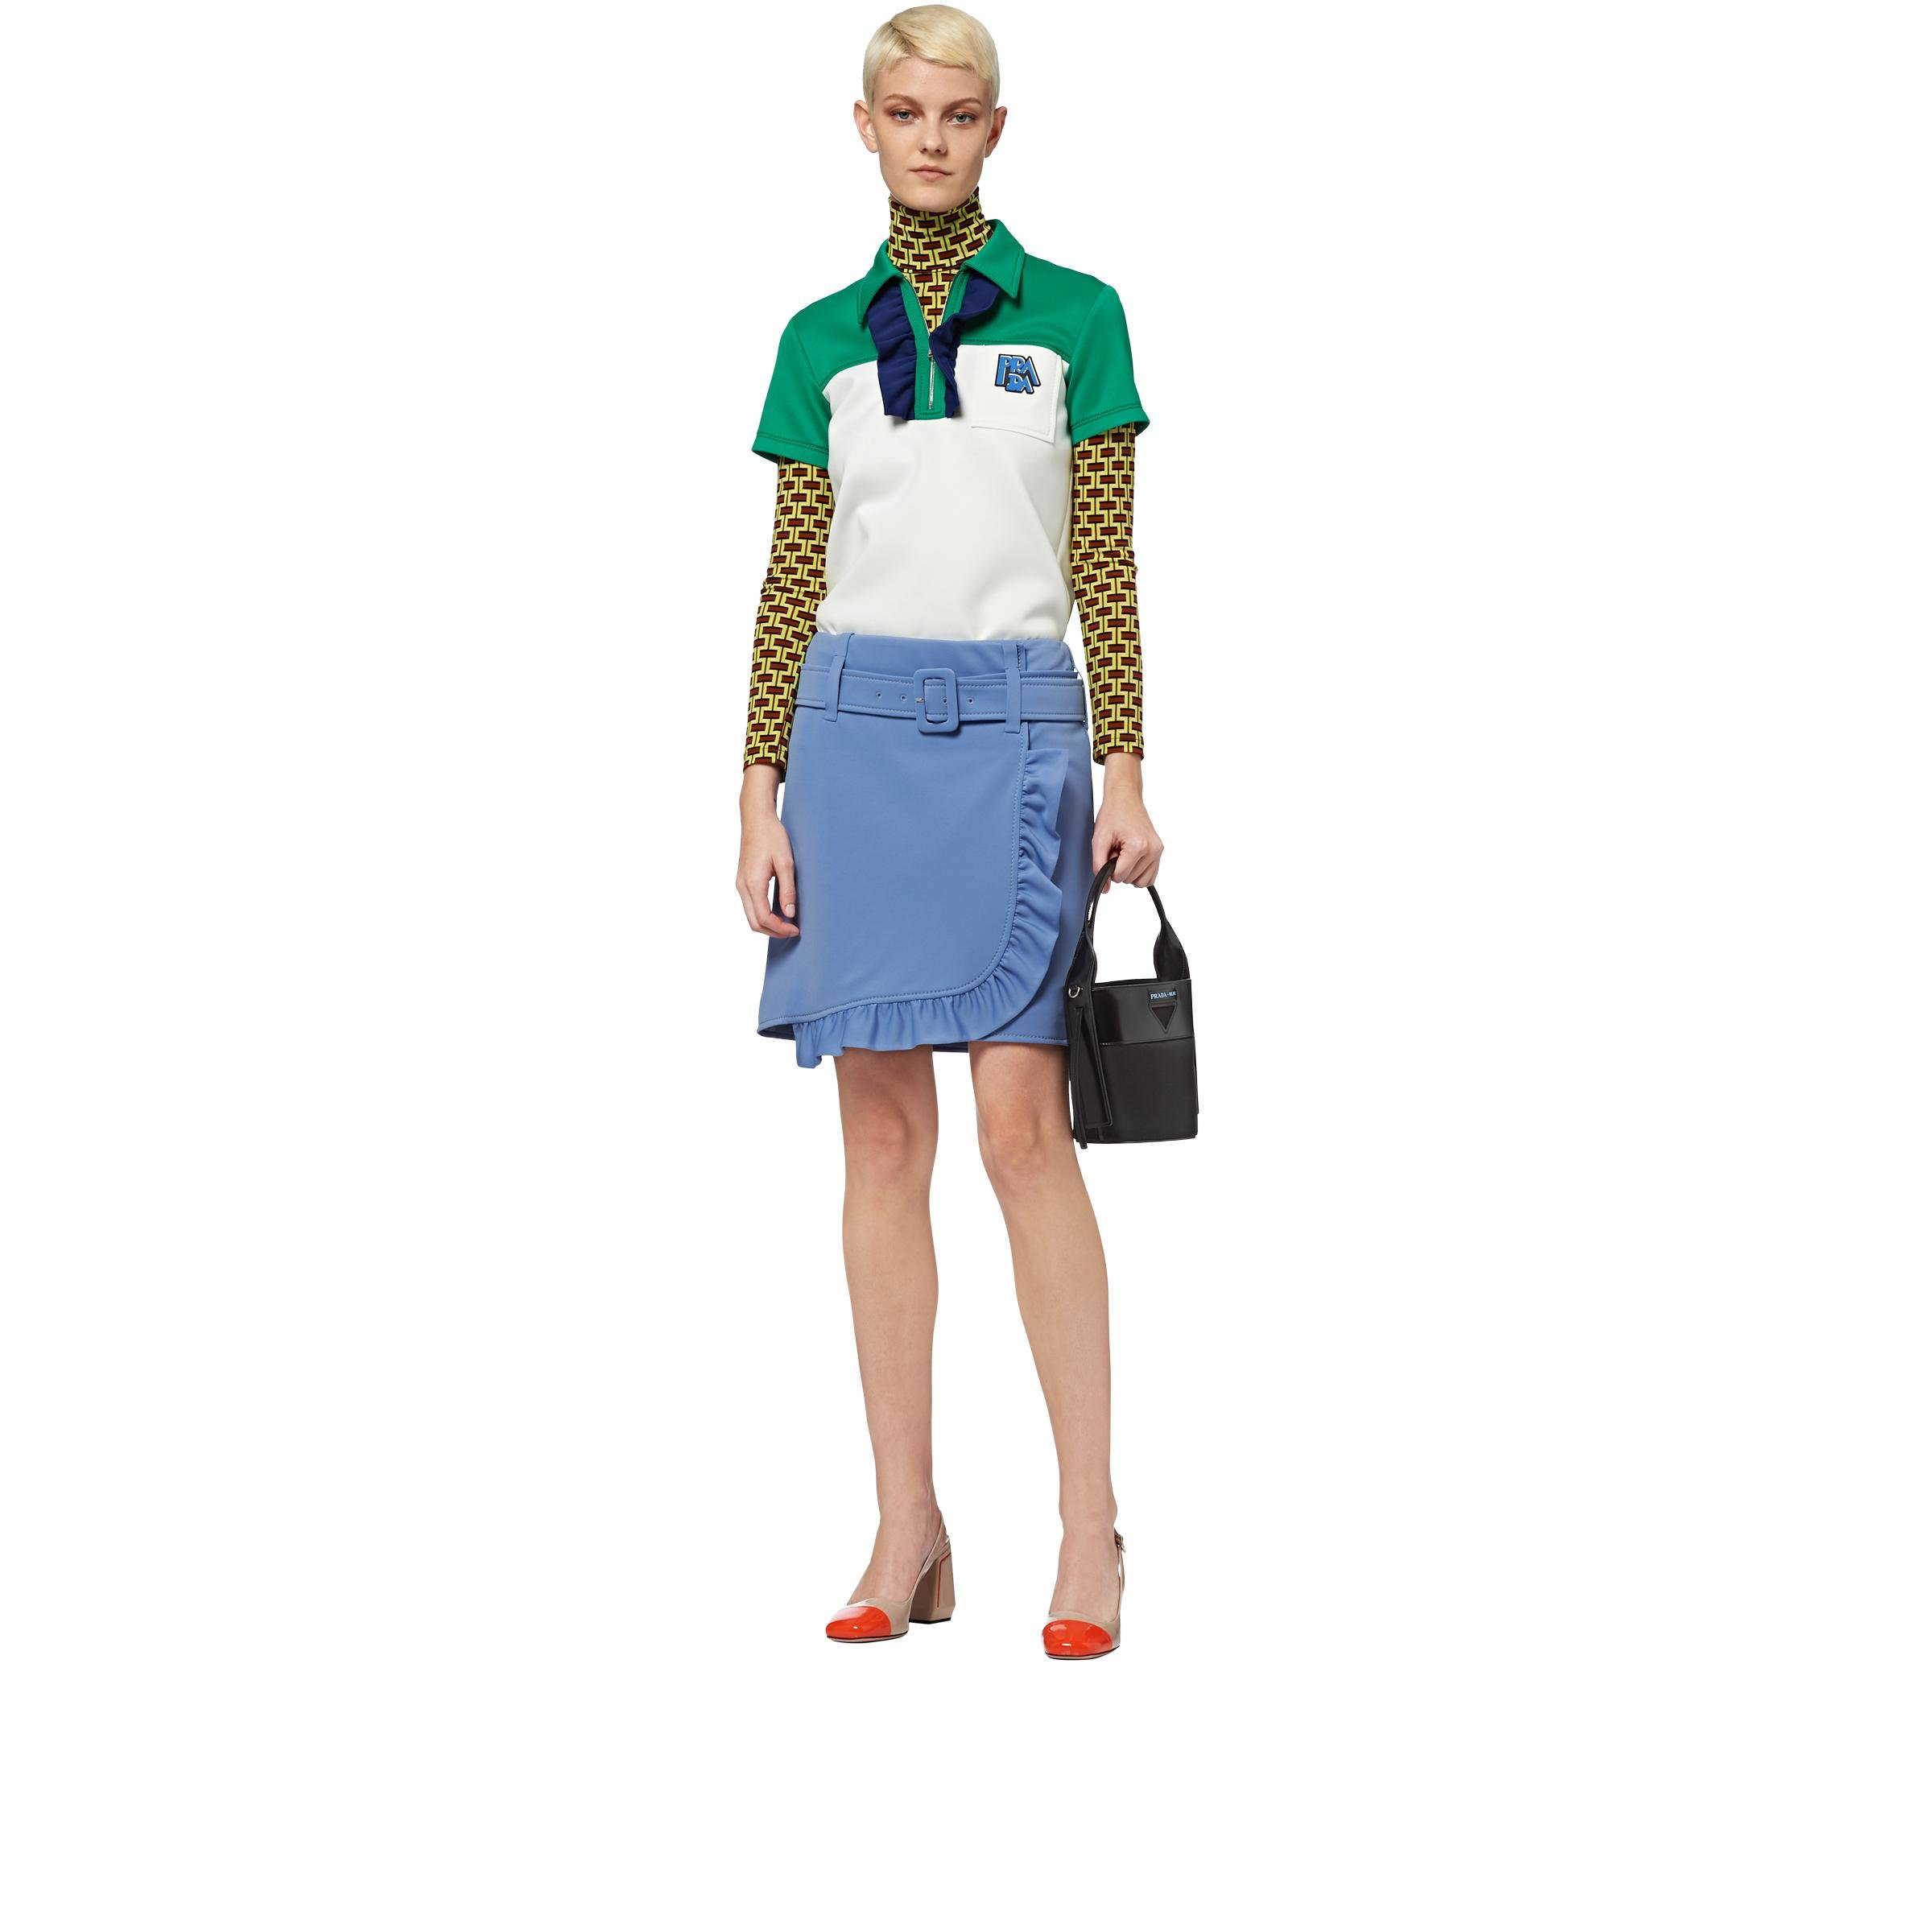

In [17]:
# Examine an image
img = Image.open(all_paths[0])
img

In [19]:
all_paths[0]

'/content/BAG/57.jpg'

In [20]:
img = Image.open(all_paths[0])
resized_img = img.resize((200, 200), Image.ANTIALIAS)
if resized_img is not None:
  images = np.array(resized_img)/255
images.shape

(200, 200, 3)

In [21]:
# Found some images are of RGB-A format, which has 4 channels. Need to convert all images to RGB
BAG20 = Image.open('/content/BAG/20.jpg')
print("BAG20 dimension is" + str(np.array(BAG20).shape))
BAG20 = BAG20.convert('RGB')
print("BAG20 dimension is" + str(np.array(BAG20).shape))

BAG20 dimension is(2400, 2400, 4)
BAG20 dimension is(2400, 2400, 3)


In [22]:
samples = []
for i in all_paths:
  img = Image.open(i)
  img = img.convert('RGB') # Convert all images to RGB which has only 3 channels
  resized_img = img.resize((200,200),Image.ANTIALIAS)
  if resized_img is not None: 
    samples.append(np.array(resized_img)/255)

In [23]:
samples = np.asarray(samples)

In [24]:
samples.shape

(200, 200, 200, 3)

### Determine Label Names Using LabelEncoder

In [25]:
label = preprocessing.LabelEncoder()
label.fit(Category)

LabelEncoder()

In [26]:
label.classes_

array(['BAG', 'DRESS', 'JEWELRY', 'JUMPSUIT', 'LINGERIE', 'OTHERS',
       'OUTERWEAR', 'PANT', 'SHOE', 'SHORTS', 'SKIRT', 'TOPS'],
      dtype='<U9')

### Transform Labels to Numbers

In [27]:
all_image_labels = label.transform(labels)

In [28]:
all_image_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  9,  9, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11])

##Data Augmentation: Flip image left to right

In [29]:
X_flip = []
for x in samples:
  X_flip.append(np.fliplr(x))
X_flip = np.asarray(X_flip)

In [30]:
X = np.append(samples, X_flip, axis = 0)

In [31]:
X.shape

(400, 200, 200, 3)

In [32]:
y = np.append(all_image_labels,all_image_labels, axis=0)
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  9,  9, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

### Shuffle Images and Labels

In [33]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=20)

In [34]:
X.shape

(400, 200, 200, 3)

In [35]:
y.shape

(400,)

In [36]:
y

array([ 0, 11, 11, 11,  1,  1, 11, 11,  7,  7,  1,  0,  0,  0,  7, 11,  1,
        0,  1,  1,  0,  5, 11,  5, 11,  0,  9,  6, 11, 11, 11, 11, 11, 11,
        7,  5,  8,  7,  1, 11,  6,  2, 11, 11,  7,  7,  8,  2,  0,  2,  0,
       11,  2, 11,  8, 11,  2,  2, 11, 11, 11, 11,  7,  0, 11,  8,  0,  1,
        1,  2,  0,  7,  1,  6, 11,  8, 11,  1, 11,  0,  6,  5,  5,  8,  8,
       11, 11,  8,  5,  0,  8, 11,  1, 11, 11, 11,  7,  7,  0, 11,  8,  5,
        1, 11,  0,  5,  8,  0,  2,  1,  4,  0,  0,  0,  1, 11, 11,  7,  5,
       11,  2,  7,  0,  1,  1,  5,  5, 11, 11, 11,  0,  8, 11, 11,  0,  8,
        9,  0,  5,  6,  5,  7,  8,  7, 11,  8,  0,  7,  7,  1,  8,  5, 11,
       11, 11, 11,  0,  0,  0,  8,  0,  1,  2,  1,  7,  7,  1,  6,  0,  7,
        4,  2, 11,  0, 11, 11, 11,  0,  5,  7,  0, 10,  7, 11,  5,  0,  8,
       11, 11, 11,  0,  0,  6, 11, 11,  2,  5,  1,  5, 11, 11, 11,  8,  1,
        5,  0, 11,  1, 11, 11,  8,  1,  0,  2,  0, 11, 10,  8, 11,  7,  3,
       11, 11, 10,  1,  8

### Split the training data into train and test sets

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Modeling

In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold

### Without Cross Validation


In [113]:
number_of_classes = len(Category)
inputs = keras.Input(shape=(200, 200, 3))
initializer = tf.keras.initializers.GlorotUniform(seed=42)
activation =  keras.activations.softmax
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# Regularize with dropout
x = keras.layers.Dropout(0.5)(x)  
outputs = keras.layers.Dense(number_of_classes,
                             kernel_initializer=initializer,
                             activation=activation)(x) 
optimizer = tf.keras.optimizers.Adam(1e-3) # low learning rate
model2 = keras.Model(inputs, outputs)

In [114]:
model2.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

model2.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_15  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_15 (Dropout)        (None, 2048)              0         
                                                                 
 dense_15 (Dense)            (None, 12)                24588     
                                                                 
Total params: 20,886,068
Trainable params: 24,588
Non-trainable params: 20,861,480
_________________________________________

In [116]:
history = model2.fit(X_train, y_train, epochs=10, batch_size = 32, validation_split = 0.2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 46s 7s/step - loss: 1.2320 - sparse_categorical_accuracy: 0.6542 - val_loss: 1.3250 - val_sparse_categorical_accuracy: 0.6375
Epoch 2/10
7/7 [==============================] - 44s 7s/step - loss: 1.0548 - sparse_categorical_accuracy: 0.7150 - val_loss: 1.1958 - val_sparse_categorical_accuracy: 0.7000
Epoch 3/10
7/7 [==============================] - 45s 7s/step - loss: 0.9551 - sparse_categorical_accuracy: 0.7897 - val_loss: 1.0990 - val_sparse_categorical_accuracy: 0.7125
Epoch 4/10
7/7 [==============================] - 45s 7s/step - loss: 0.8198 - sparse_categorical_accuracy: 0.7757 - val_loss: 1.0067 - val_sparse_categorical_accuracy: 0.7250
Epoch 5/10
7/7 [==============================] - 45s 7s/step - loss: 0.7791 - sparse_categorical_accuracy: 0.7617 - val_loss: 0.9180 - val_sparse_categorical_accuracy: 0.7375
Epoch 6/10
7/7 [==============================] - 45s 7s/step - loss: 0.6782 - sparse_categorical_accuracy: 0.8364 - val_loss: 0.84

In [ ]:
scores2 = model2.evaluate(X_test, y_test, verbose=0)

In [ ]:
print(f'Score for fold {fold_no}: {model2.metrics_names[0]} of {scores[0]}; {model2.metrics_names[1]} of {scores[1]*100}%')
print('acc is:' + str(scores2[1] * 100))
print('loss is: ' + str(scores2[0]))

### With k-fold cross-validation


In [107]:
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X_train, y_train):
  base_model = keras.applications.Xception(
      weights='imagenet',  # Load weights pre-trained on ImageNet.
      input_shape=(200, 200, 3),
      include_top=False)  # Do not include the ImageNet classifier at the top.
    
  # Freeze the base model parameters
  base_model.trainable = False

  number_of_classes = len(Category)
  inputs = keras.Input(shape=(200, 200, 3))
  initializer = tf.keras.initializers.GlorotUniform(seed=42)
  activation =  keras.activations.softmax
  batch_size = 32
  no_epochs = 10
  x = base_model(inputs, training=False)
  # Convert features of shape `base_model.output_shape[1:]` to vectors
  x = keras.layers.GlobalAveragePooling2D()(x)
  # Regularize with dropout
  x = keras.layers.Dropout(0.5)(x)  
  outputs = keras.layers.Dense(number_of_classes,
                             kernel_initializer=initializer,
                             activation=activation)(x) 
  optimizer = tf.keras.optimizers.Adam(1e-3) # low learning rate
  model = keras.Model(inputs, outputs)
  model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

  print('------------------------------------------------------------------------')
  print('Training for fold {}'.format(fold_no))

  # Fit data to model
  history = model.fit(X_train[train], y_train[train],
              batch_size=batch_size,
              epochs=no_epochs)

  # Generate generalization metrics
  scores = model.evaluate(X_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 35s 4s/step - loss: 2.2980 - sparse_categorical_accuracy: 0.1916
Epoch 2/10
7/7 [==============================] - 31s 4s/step - loss: 1.7686 - sparse_categorical_accuracy: 0.3738
Epoch 3/10
7/7 [==============================] - 31s 4s/step - loss: 1.4658 - sparse_categorical_accuracy: 0.5374
Epoch 4/10
7/7 [==============================] - 31s 4s/step - loss: 1.2619 - sparse_categorical_accuracy: 0.6542
Epoch 5/10
7/7 [==============================] - 32s 4s/step - loss: 1.0702 - sparse_categorical_accuracy: 0.7757
Epoch 6/10
7/7 [==============================] - 32s 4s/step - loss: 0.8999 - sparse_categorical_accuracy: 0.7804
Epoch 7/10
7/7 [==============================] - 31s 4s/step - loss: 0.7989 - sparse_categorical_accuracy: 0.7944
Epoch 8/10
7/7 [==============================] - 31s 4s/step - loss: 0.7039 - sparse_categorical_accuracy: 0.8411
Epoch 9/10
7/7 [==============================] - 31s 4s/step - loss: 0.6372 - sparse_categ

In [117]:
scores = model.evaluate(X_test, y_test, verbose=1)

5/5 [==============================] - 20s 4s/step - loss: 1.0687 - sparse_categorical_accuracy: 0.6970


In [119]:
print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
print('acc is:' + str(scores[1] * 100))
print('loss is: ' + str(scores[0]))

Score for fold 6: loss of 1.0686566829681396; sparse_categorical_accuracy of 69.69696879386902%
acc is:69.69696879386902
loss is: 1.0686566829681396


##Prepare Images for Prediction

In [54]:
prediction_paths = glob.glob("/content/prediction_images/*")
len(prediction_paths)

800

In [59]:
prediction_images = []
for path in prediction_paths:
  prediction_images.append((int(path[-7:-4]), path))

In [62]:
prediction_images = sorted(prediction_images)

In [63]:
pred_X = []
for x in prediction_images:
  img = Image.open(x[1])
  img = img.convert('RGB') # Convert all images to RGB which has only 3 channels
  resized_img = img.resize((200,200),Image.ANTIALIAS)
  if resized_img is not None: 
    pred_X.append(np.array(resized_img)/255)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [66]:
pred_X = np.asarray(pred_X)

In [67]:
pred_X.shape

(800, 200, 200, 3)

## Make Category Predictions on the Images

In [112]:
predictions = model.predict(
    pred_X,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

In [120]:
# Transform the predicted probability back to classes
classes = np.argmax(predictions, axis = 1)
predicted_classes = label.inverse_transform(classes)

##Post Processing: Adding Category Based on Predicted Class and Rules

In [121]:
# Remove HTML Tags
import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [122]:
# Label it with predicted class first, then check with the rules
for i in range(200, len(prediction_paths) + 200):
  data[i]['Category'] = predicted_classes[i-200]
  raw_text = data[i]['description']
  corpus = cleanhtml(raw_text)
  corpus = set([x.lower() for x in corpus.split()])
  if {'tee', 'shirt', 'tank', 'polo'}.intersection(corpus):
    data[i]['Category'] = 'TOPS'
  elif {'bag'}.intersection(corpus):
    data[i]['Category'] = 'BAG'
  elif {'jacket', 'outerwear'}.intersection(corpus):
    data[i]['Category'] = 'OUTERWEAR'
  elif {'heels', 'heel', 'toes', 'toe', 'mm', 'cm', 'sole'}.intersection(corpus):
    data[i]['Category'] = 'SHOE'
  elif {'dress'}.intersection(corpus):
    data[i]['Category'] = 'DRESS'
  elif {'pant', 'jeans'}.intersection(corpus):
    data[i]['Category'] = 'PANT'

## Output the json file 

In [123]:
os.chdir('/content/')
with open('finished_data.json', 'w') as outfile:
    json.dump(data, outfile, indent = 2)